LIFE EXPECTANCY AND GDP 

Is there a correlation between the GDP of a country and the life expectancy of its people?

- Has life expectancy increased over time in the six nations?
- Has GDP increased over time in the six nations?
- Is there a correlation between GDP and life expectancy of a country?
- What is the average life expectancy in these nations?
- What is the distribution of that life expectancy?


In [2]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
#loading and inspecting data.
df = pd.read_csv("all_data.csv")
#what countries do we have?
print(df.Country.unique())
df.head()


['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [4]:
#replace to make it shorter
df['Country']=df.Country.replace('United States of America', 'USA')
print(df.Country.unique())

['Chile' 'China' 'Germany' 'Mexico' 'USA' 'Zimbabwe']


In [5]:
#what years do we have?
print(df.Year.unique())
#how many rows and columns do we have?
df.shape

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


(96, 4)

In [6]:
#rename column for shorter name
df.rename(columns={"Life expectancy at birth (years)":"LE"}, inplace=True)
df.head()

,Country,Year,LE,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [36]:
#calculate the mean of the Life expectancy and the GDP for each country
dfMeans = df.groupby("Country").mean().reset_index()
print(dfMeans)
dfMax = df.groupby("Country").max().reset_index()
print(dfMax)
dfMin = df.groupby("Country").min().reset_index()
print(dfMin)

    Country    Year        LE           GDP
0     Chile  2007.5  78.94375  1.697888e+11
1     China  2007.5  74.26250  4.957714e+12
2   Germany  2007.5  79.65625  3.094776e+12
3    Mexico  2007.5  75.71875  9.766506e+11
4       USA  2007.5  78.06250  1.407500e+13
5  Zimbabwe  2007.5  50.09375  9.062580e+09
    Country  Year    LE           GDP
0     Chile  2015  80.5  2.783840e+11
1     China  2015  76.1  1.106470e+13
2   Germany  2015  81.0  3.890610e+12
3    Mexico  2015  76.7  1.298460e+12
4       USA  2015  79.3  1.810000e+13
5  Zimbabwe  2015  60.7  1.630467e+10
    Country  Year    LE           GDP
0     Chile  2000  77.3  6.973681e+10
1     China  2000  71.7  1.211350e+12
2   Germany  2000  78.0  1.949950e+12
3    Mexico  2000  74.8  6.836480e+11
4       USA  2000  76.8  1.030000e+13
5  Zimbabwe  2000  44.3  4.415703e+09


with SEABORN

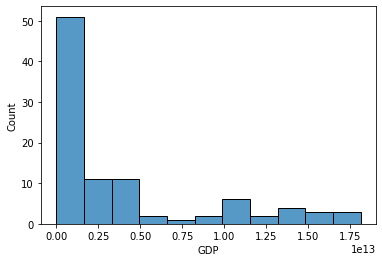

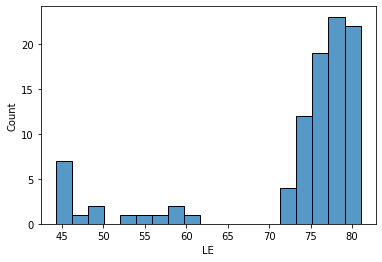

In [8]:
#plot the histogram for both GDP and LE
sns.histplot(x='GDP', data=df)
plt.show()
plt.close()

sns.histplot(x='LE', data=df)
plt.show()
plt.close()

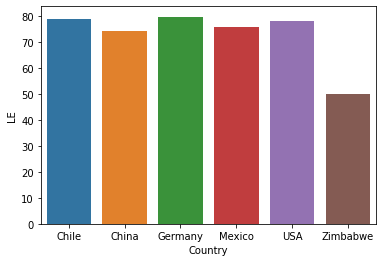

<AxesSubplot:xlabel='Country', ylabel='GDP'>

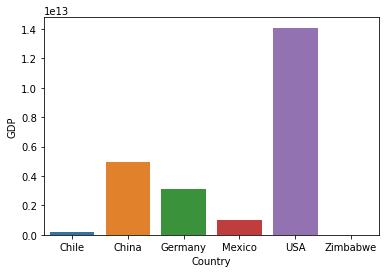

In [9]:
#plot of the mean of life expectancy and GDP for each country
plt.figure(figsize=(6,4))
sns.barplot(x="Country", y="LE", data=dfMeans)
plt.show()
plt.close()

plt.figure(figsize=(6,4))
sns.barplot(x="Country", y="GDP", data=dfMeans)

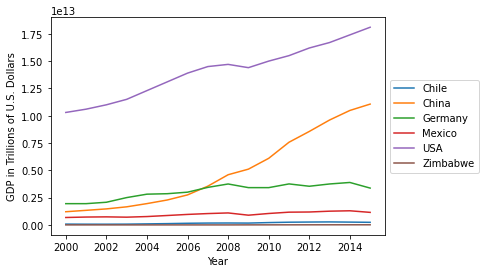

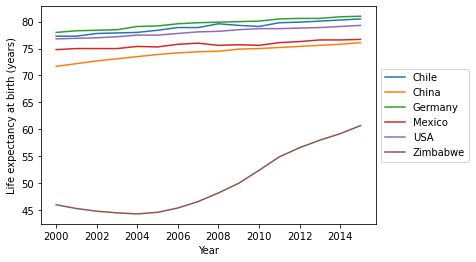

In [10]:
#plot of the evolution of GDP/Life expectancy over time for each country.
sns.lineplot(x=df.Year, y=df.GDP, hue=df.Country)
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.ylabel("GDP in Trillions of U.S. Dollars")
plt.show()
plt.close()

sns.lineplot(x=df.Year, y=df.LE, hue=df.Country)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel("Life expectancy at birth (years)")
plt.show()
plt.close()

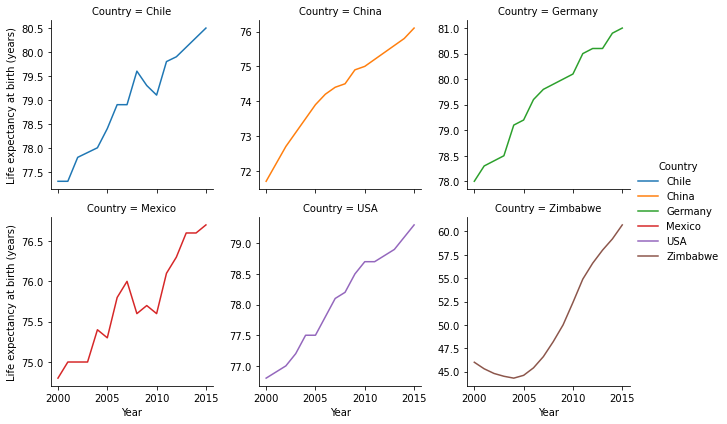

In [11]:
#grid plot of the life expectancy over the years for each country separately
gLE = sns.FacetGrid(data=df, col="Country", col_wrap=3, hue = "Country", sharey = False)

gLE = (gLE.map(sns.lineplot,"Year","LE").add_legend().set_axis_labels("Year","Life expectancy at birth (years)"))

gLE;

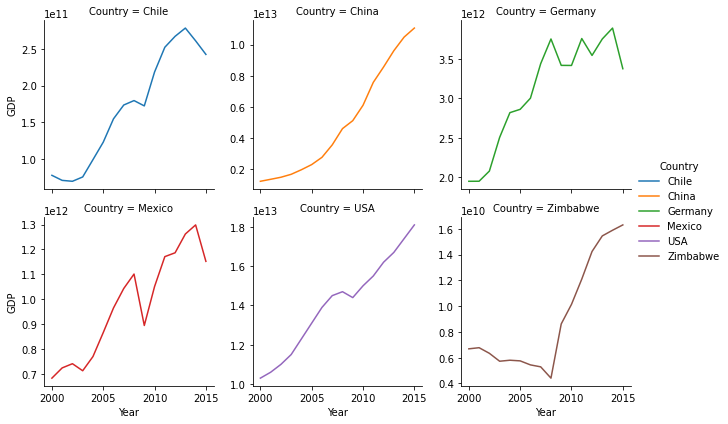

In [12]:
#grid plot of the GDP over the years for each country separately
g = sns.FacetGrid(data=df, col="Country", col_wrap=3, hue = "Country", sharey = False)

g = (g.map(sns.lineplot,"Year","GDP").add_legend().set_axis_labels("Year","GDP"))

g;

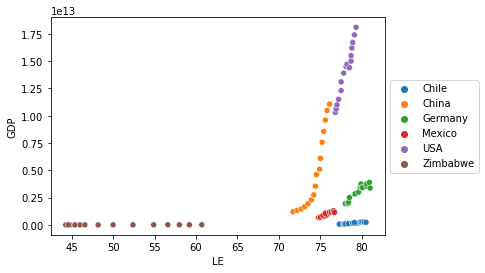

In [13]:
#scatterplot of the GDP and life expectancy for all countries. Relation between this two kpis.
sns.scatterplot(x=df.LE, y=df.GDP, hue=df.Country).legend(loc='center left', bbox_to_anchor=(1, 0.5));

with MATPLOTLIB

In [14]:
#a few general calculations of our whole data set.
print(df.groupby('Country').Year.count())
print(df.groupby('Year').Country.count())
gdp_mean = df.groupby('Country').GDP.mean()
print(gdp_mean)

Country
Chile       16
China       16
Germany     16
Mexico      16
USA         16
Zimbabwe    16
Name: Year, dtype: int64
Year
2000    6
2001    6
2002    6
2003    6
2004    6
2005    6
2006    6
2007    6
2008    6
2009    6
2010    6
2011    6
2012    6
2013    6
2014    6
2015    6
Name: Country, dtype: int64
Country
Chile       1.697888e+11
China       4.957714e+12
Germany     3.094776e+12
Mexico      9.766506e+11
USA         1.407500e+13
Zimbabwe    9.062580e+09
Name: GDP, dtype: float64


In [15]:
countries = df.Country
LE = df.LE
GDP = df.GDP
years = df.Year
print(countries)

0        Chile
1        Chile
2        Chile
3        Chile
4        Chile
        ...   
91    Zimbabwe
92    Zimbabwe
93    Zimbabwe
94    Zimbabwe
95    Zimbabwe
Name: Country, Length: 96, dtype: object


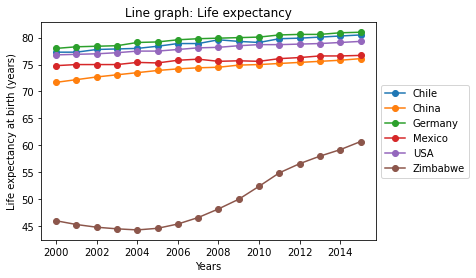

None


In [29]:
country = df.Country.unique()
def LE_timeseries():
    for i in country:
        c = df[df.Country == i]
        plt.plot(c.Year, c.LE, label = i, marker = 'o')
        plt.xlabel('Years')
        plt.ylabel('Life expectancy at birth (years)')
        plt.title('Line graph: Life expectancy')
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        
    plt.show()
print(LE_timeseries())

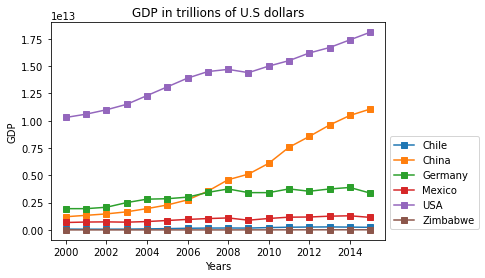

None


In [33]:
country = df.Country.unique()
def gdp_timeseries():
    for i in country:
        c = df[df.Country == i]
        plt.plot(c.Year, c.GDP, label = i, marker = 's')
        plt.xlabel('Years')
        plt.ylabel('GDP')
        plt.title('GDP in trillions of U.S dollars')
        plt.legend(loc='upper left', bbox_to_anchor=(1, 0.5))
        
    plt.show()
print(gdp_timeseries())

RESULTS

Has life expectancy increased over time in the six nations?

For all countries except Zimbabwe there is a really low increase of life expectancy over time. However, for Zimbabwe the increase is really hight, having a mean of 50 years and a min of 44 years compared to the max of 60 years over the course of 15 years of data.

Has GDP increased over time in the six nations?

The countries that show a significant increase on GDP are China and the USA.

Is there a correlation between GDP and life expectancy of a country?

Yes, there is a positive correlation between life expectancy and GDP. We can conclude that the economic health of a country will have a direct impact on the amount of years its population can live.

What is the average life expectancy in these nations?

The average life expectancy for all countries except Zimbabwe is between 74 and 80 years. For Zimbabwe the average is 50 years.

What is the distribution of that life expectancy?

The distribution was left skewed.